In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torch import nn

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
data.target.shape

(569,)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.data, data.target, test_size=0.33)

In [13]:
x_train.shape

(381, 30)

In [14]:
N,D = x_train.shape

In [15]:
#preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
#building the model
model = nn.Sequential(
        nn.Linear(D,1),
        nn.Sigmoid()
)

In [17]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [18]:
#convert data into tensors
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [19]:
x_test

tensor([[ 1.0803,  0.3422,  1.0453,  ...,  1.2532,  0.2500,  0.1003],
        [-0.9534,  1.1652, -0.9643,  ..., -1.2809,  0.2484, -0.4045],
        [ 0.2663, -0.5804,  0.2638,  ...,  0.1428,  0.8130,  0.8124],
        ...,
        [ 0.6152,  0.9519,  0.6837,  ...,  1.6747,  3.0475,  0.7398],
        [-0.1989,  0.3793, -0.1627,  ...,  1.6901, -0.1512,  1.3707],
        [ 3.2757, -0.3996,  3.3627,  ...,  2.4560,  1.2491,  0.2799]])

In [20]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    optimizer.zero_grad()
    #get train loss
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    #Backward and optimize
    loss.backward()
    optimizer.step()
    
    #get test loss
    outputs_test = model(x_test)
    loss_test = criterion(outputs_test, y_test)
    
    #store losses
    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()
    
    if(it+1) % 50 == 0:
        print(f'Epoch {it+1}/{n_epochs}, train loss: {loss.item():.4f}, test loss: {loss_test.item():.4f}')        

Epoch 50/1000, train loss: 0.3276, test loss: 0.3096
Epoch 100/1000, train loss: 0.2568, test loss: 0.2378
Epoch 150/1000, train loss: 0.2150, test loss: 0.1965
Epoch 200/1000, train loss: 0.1877, test loss: 0.1697
Epoch 250/1000, train loss: 0.1685, test loss: 0.1510
Epoch 300/1000, train loss: 0.1541, test loss: 0.1371
Epoch 350/1000, train loss: 0.1429, test loss: 0.1264
Epoch 400/1000, train loss: 0.1340, test loss: 0.1178
Epoch 450/1000, train loss: 0.1266, test loss: 0.1108
Epoch 500/1000, train loss: 0.1204, test loss: 0.1049
Epoch 550/1000, train loss: 0.1151, test loss: 0.1000
Epoch 600/1000, train loss: 0.1105, test loss: 0.0957
Epoch 650/1000, train loss: 0.1065, test loss: 0.0920
Epoch 700/1000, train loss: 0.1029, test loss: 0.0887
Epoch 750/1000, train loss: 0.0998, test loss: 0.0858
Epoch 800/1000, train loss: 0.0969, test loss: 0.0832
Epoch 850/1000, train loss: 0.0944, test loss: 0.0809
Epoch 900/1000, train loss: 0.0920, test loss: 0.0789
Epoch 950/1000, train loss: 0

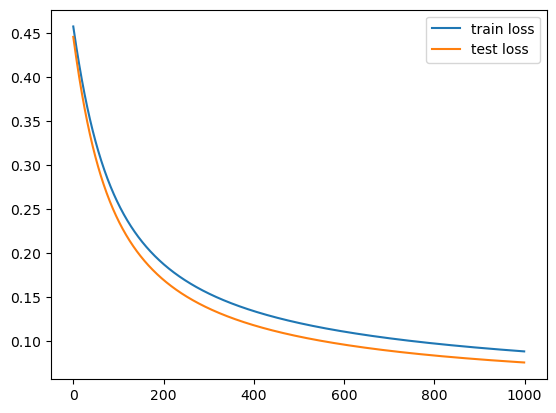

In [21]:
plt.plot(train_losses, label ='train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [22]:
#get accuracy
with torch.no_grad():
    p_train = model(x_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)
    
    p_test = model(x_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)
    print(f'Train acc: {train_acc:4f}, Test acc: {test_acc:4f}')

Train acc: 0.986877, Test acc: 0.984043


In [23]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3356, -0.5993, -0.5340, -0.4290, -0.2543, -0.2270, -0.3692, -0.4389,
                       -0.2103,  0.4345, -0.6176,  0.1105, -0.4583, -0.4394, -0.0613,  0.4672,
                        0.1010, -0.4919,  0.3331,  0.3920, -0.3222, -0.4520, -0.5645, -0.2618,
                       -0.3460, -0.3580, -0.4402, -0.3313, -0.5152, -0.2482]])),
             ('0.bias', tensor([0.4484]))])

In [28]:
torch.save(model.state_dict(),'mymodel.pt')

In [29]:
!ls

Linear Classification Note.ipynb moore.csv
Pytorch_Moores Law.ipynb         mymodel.pt
Untitled.ipynb


In [31]:
model2 = nn.Sequential(
        nn.Linear(D,1),
        nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [32]:
#Evaluating the new model

with torch.no_grad():
    p_train = model2(x_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)
    
    p_test = model2(x_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)
    print(f'Train acc: {train_acc:4f}, Test acc: {test_acc:4f}')

Train acc: 0.986877, Test acc: 0.984043
